## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ --- ортогональная матрица размера $m\times m$, $V$ --- ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ --- диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ --- ортогональная матрица размера $m\times k$, $V^T$ --- ортогональная матрица размера $k\times n$, $\Sigma$ --- диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ - это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем вам использовать

`import scipy.linalg.as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Обращаем ваше внимание на то, что `U, S, Vt` - это соответственно матрицы $U$, $\Sigma$ и $V^T$ (не забывайте про это $^T$). Параметр `full_matrices` отвечает за то, будет ли сингулярное разложение полным или усечённым. 

### Задание 1. Сжатие данных с помощью SVD

Загрузите картинку на ваше усмотрение.

In [1]:
from PIL import Image
import numpy as np
from skimage import io

img = Image.open(r'joker.jpg').convert('LA')
img = np.asarray(img).mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

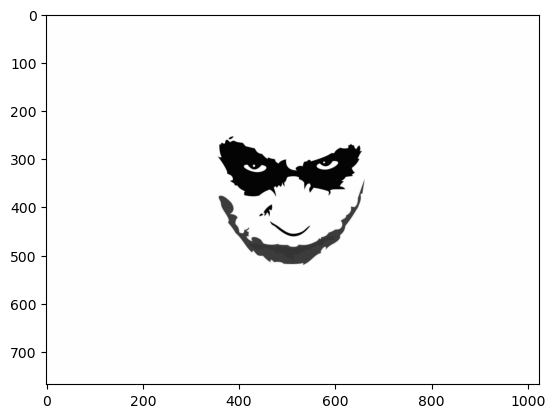

In [2]:
import pylab as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [3]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

Нарисуйте график диагональных элементов матрицы $\Sigma$:

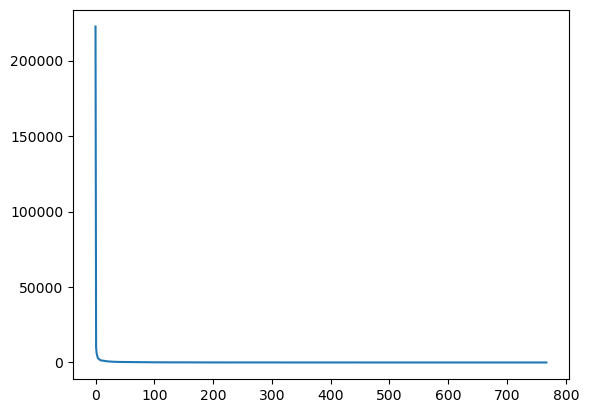

In [4]:
sigma = S
plt.plot(sigma)

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

Визуализуйте первую компоненту ранга 1. Ожидали ли вы увидеть именно это? Почему?

Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

**Важно:** пожалуйста, сделайте это с помощью только матричных операций, без циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

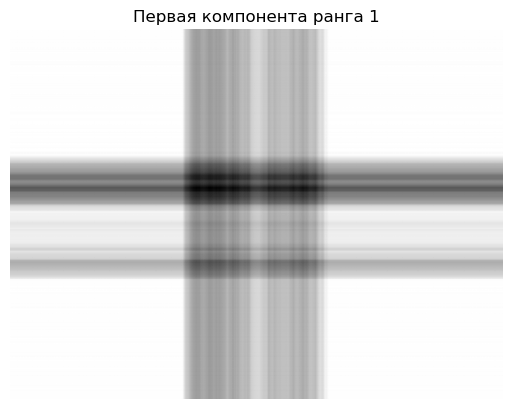

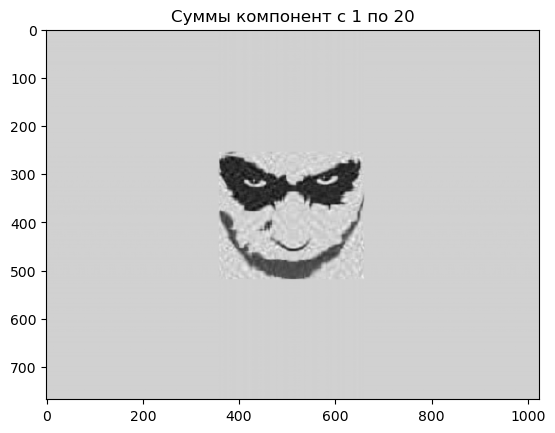

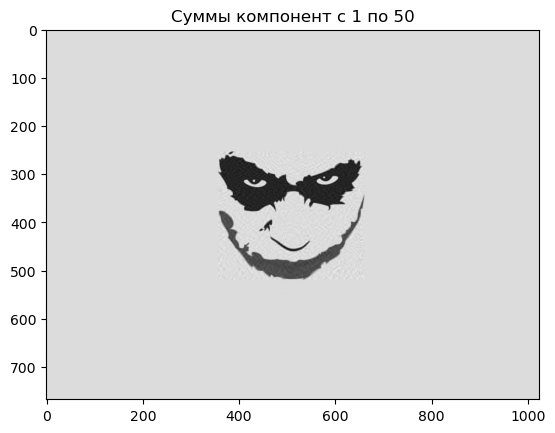

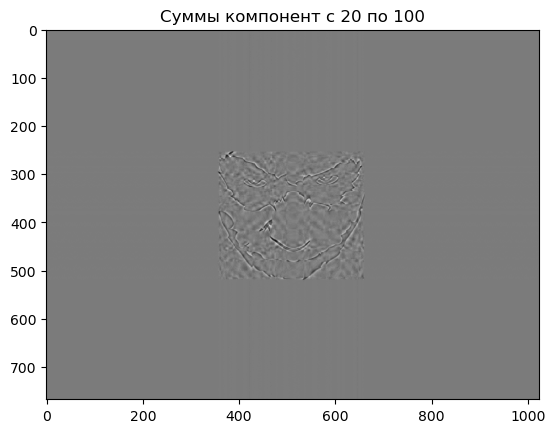

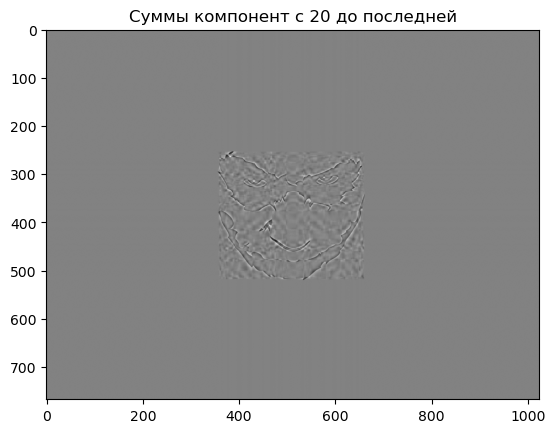

In [5]:
# Визуализируем первую компоненту ранга 1
rank_1_component = S[0] * np.outer(U[:, 0], VT[0, :])
plt.imshow(rank_1_component, cmap='gray')
plt.title('Первая компонента ранга 1')
plt.axis('off')
plt.show()

# Функция для визуализации сумм компонент ранга
def plot_sum_of_components(start, end, U, S, VT, title):
    rank_k_approx = np.dot(U[:, start:end], np.dot(np.diag(S[start:end]), VT[start:end, :]))
    plt.imshow(rank_k_approx, cmap='gray')
    plt.title(title)
    #plt.axis('off')
    plt.show()

# Суммы компонент ранга
plot_sum_of_components(0, 20, U, S, VT, 'Суммы компонент с 1 по 20')
plot_sum_of_components(0, 50, U, S, VT, 'Суммы компонент с 1 по 50')
plot_sum_of_components(20, 100, U, S, VT, 'Суммы компонент с 20 по 100')
plot_sum_of_components(20, len(S), U, S, VT, 'Суммы компонент с 20 до последней')


Как вам кажется, сколько первых главных компонент нужно взять для достаточно хорошего восстановления исходного изображения? Во сколько раз меньше памяти потребуется для их хранения?

`Чтобы определить, сколько первых главных компонент нужно взять для достаточно хорошего восстановления исходного изображения, мы можем ориентироваться на убывание сингулярных значений. Важно заметить, что изображение может быть аппроксимировано с приемлемой точностью с использованием относительно небольшого числа компонент, поскольку сингулярные значения обычно быстро убывают.`


### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD.

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки - объекты, столбцы - признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ - это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V^T$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, - это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right),$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ - это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ - это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ - это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ - среднее значения признака.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых признаков" - это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять две-три первых, то датасет можно нарисовать и посмотреть на него - и, возможно, обнаружить какую-то структуру.

**Задание 2.1.** С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого - это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


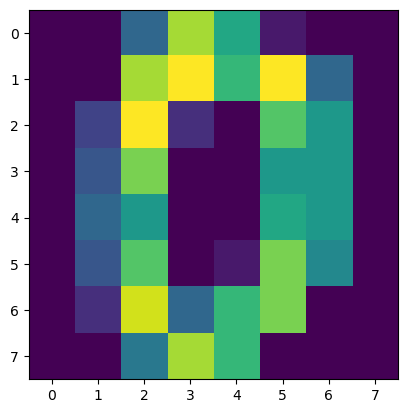

In [11]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

Примените к матрице `digits.data` сингулярное разложение.

Первые два столбца матрицы $U\Sigma$ - это проекция датасета на некоторую плоскость (объекты - это строки!). Нарисуйте на плоскости эти точки, покрасив различные цифры (0,1,2,...) в разные цвета. Получается ли какая-то структура?

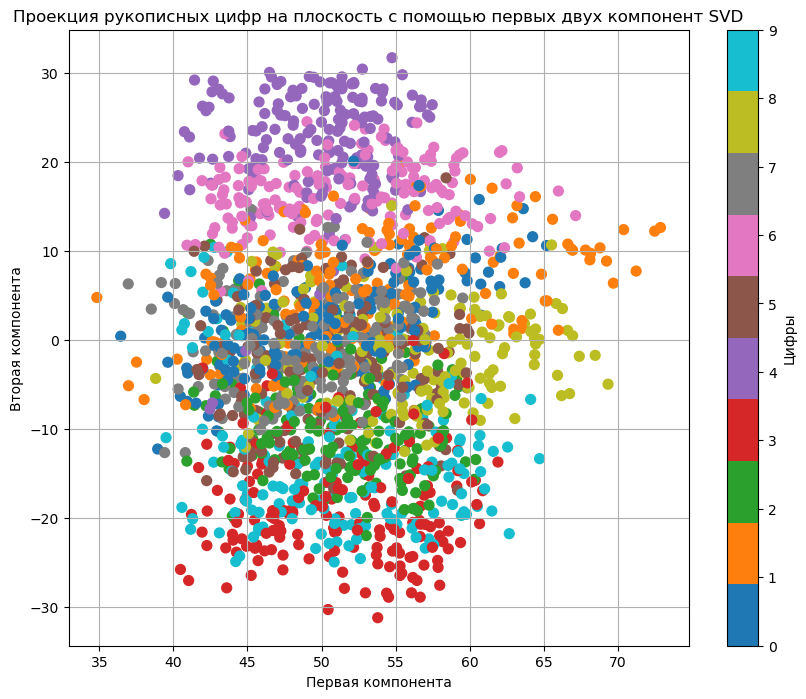

In [13]:
from sklearn.decomposition import TruncatedSVD

# Применение SVD к данным digits.data
# Используем TruncatedSVD для выполнения SVD, ограниченного на 2 компоненты
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(digits.data)

# Визуализация первых двух компонент
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=digits.target, cmap='tab10', s=50)
plt.colorbar(scatter, label='Цифры')
plt.title('Проекция рукописных цифр на плоскость с помощью первых двух компонент SVD')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.grid(True)
plt.show()

Если вы всё сделали правильно, то никакой структуры не должно было получиться:)

А всё потому, что мы не сделали одной важной вещи (почему она важна - мы с вами увидим в конце третьего задания). Теперь вычтите из каждого признака (т.е. из каждого столбца) его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

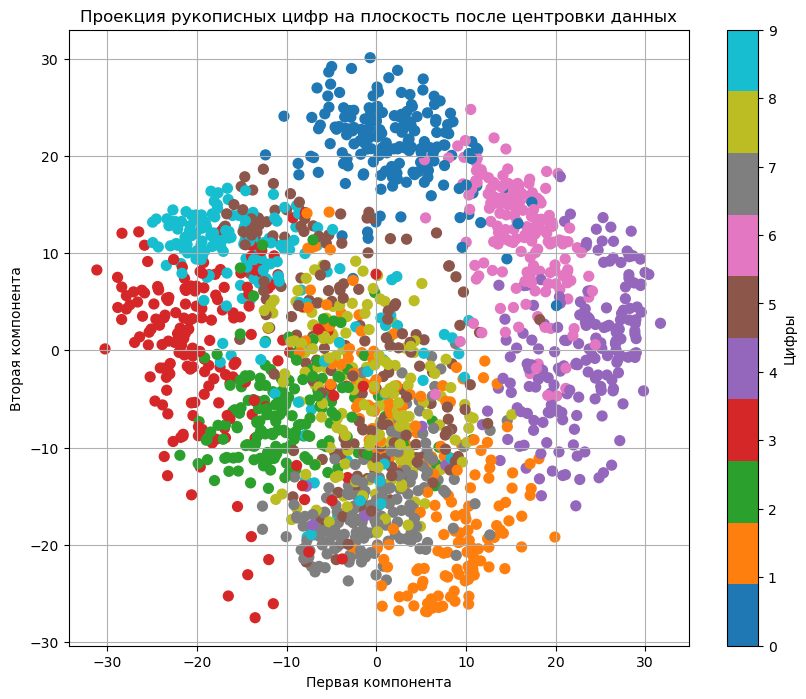

In [14]:
# Центровка данных: вычитаем среднее значение по каждому столбцу
data_centered = digits.data - np.mean(digits.data, axis=0)

# Применение SVD к центрированным данным
svd = TruncatedSVD(n_components=2)
X_svd_centered = svd.fit_transform(data_centered)

# Визуализация первых двух компонент центрированных данных
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_svd_centered[:, 0], X_svd_centered[:, 1], c=digits.target, cmap='tab10', s=50)
plt.colorbar(scatter, label='Цифры')
plt.title('Проекция рукописных цифр на плоскость после центровки данных')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.grid(True)
plt.show()

Теперь у вас должна была получиться красивая картинка!

## Генетические алгоритмы (дополнительное задание для желающих)

Идея генетического алгоритма проста, поскольку "подсмотрена" у природы. Смысл такого алгоритма заключается в том, что под действием некоторого процесса отбора (то есть эволюции) более слабые индивиды (то есть уменьшающие функцию полезности или увеличивающие функцию потерь) исчезнут из популяции.

Структура каждого шага алгоритма делится на три принциальных этапа: скрещивание (кроссинговер), селекция (отбор), формирование новой популяции. Давайте более подробно изучим данную последовательность:

**Формирование новой популяции:** сначала требуется инциализировать систему некоторой популяцией. Если мы говорим о первом шаге алгоритма, то популяция вполне может быть скверной и ничего не оптимизировать. Здесь наиболее важно корректно задать, кто же является "особью" популяции для конкретной задачи и как происходит их скрещивание.

**Кроссинговер:** идея полностью наследуется из реальной жизни: для формирования популяции на следующем этапе выбирают пары "родителей" (причем не принципиально их качество) и потомок наследует их качества по некоторому правилу.

**Мутация:** иногда оказывается, что случайные замены генов особи скверно сказываются на выживаемости, но иногда наблюдается обратное.

Итак, давайте решим таким образом некоторую задачу.

Пусть дано диафантово уравнение (все числа целые):
$$ a_1 x_1+a_2 x_2+\ldots +a_nx_n=b$$

Считайте, что на вход вашей программе подается вектор `a` и число `b`. Сгенерируйте начальную популяцию решений уравнения как векторов $(x_1, x_2, \ldots x_n)$, где каждый элемент равномерно распределен на отрезке $[-b, b]$. Договоримся, что в популяции хотя бы $n+1$ решение:

Для каждой особи вычислите функцию потерь - модуль разности левой и правой части уравнения, $loss_i$. Соответственно более сильные особи должны обладать меньшей функцией потерь, чтобы выжить.

Для более удобного дальнейшего отбора вычислите вероятности выживания:
$$p_i=\frac{loss_i}{\sum loss_j}$$

Сгенерируйте случайные пары родителей соответственно полученному вектору вероятностей. Для каждой пары создайте потомка по принципу кроссинговера: потомок получает первые $k$ координат вектора от отца, а все остальные от матери, $k$ выберите самостоятельно. Сравните среднюю величину функции потерь $loss_i$ для нового поколения с поколением родителей.

Что делать, если средняя функция потерь увеличилась?

В таких ситуациях применяют мутацию: случайно меняют одну из компонент вектора некоторого количества особей. Выбор компоненты и количества мутируемых сделайте самостоятельно.

Полученный алгоритм запустите в цикле до достаточного уменьшения функции потерь.

Совет: используйте популяции, сильно превосходящие размерность задачи.

Указание: циклы в решениях не приветствуются, постарайтесь пользоваться матричными вычислениями! Сравните результаты работы с известными решениями диафантовых уравнений.

## Градиентный спуск (дополнительный материал)

Выпишем ещё раз явную формулу параметров линейной модели:

$$w = (X^TX)^{-1}X^Ty.$$

Здесь присутствует обращение матрицы $X^TX$ — очень трудоёмкая операция при большом количестве признаков. Нетрудно подсчитать, что сложность вычислений $O(d^3 + d^2l)$. При решении задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры ищут итерационными методами, стоимость которых меньше. Один из них — градиентный спуск.

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала: 

$$w^{(k+1)} = w^{(k)} - \eta_k \nabla Q(w^{(k)}),$$
где $\eta_k$ — шаг градиентного спуска.

Формула градиента функции ошибки выглядит следующим образом:

$$\nabla Q(w) = -2X^Ty + 2X^TXw = 2X^T(Xw - y).$$
 
Сложность вычислений в данном случае $O(dl)$. Стохастический градиентный спуск отличается от обычного заменой градиента на несмещённую оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ — количество объектов, по которым оценивается градиент, $k << l$. Это отчасти объясняет популярность стохастических методов оптимизации.

In [2]:
%pylab inline
np.random.seed(16)

Populating the interactive namespace from numpy and matplotlib


Создадим данные для эксперимента следующим образом: сгенерируем вектор параметров $w_{true}$ и матрицу объекты признаки $X$. Вектор из целевых переменных $Y$ будет вычисляться как зашумлённая версия $Xw_{true}$:

In [3]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  # for different scales
Y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_0 = np.random.uniform(-2, 2, (n_features))

Обучим линейную регрессию (в случае среднеквадратичной ошибки) для этих данных при помощи GD — тем самым получим значения параметров.

In [4]:
w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2

for i in range(num_steps):
    w -= 2 * step_size * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
    w_list.append(w.copy())
w_list = np.array(w_list)

Покажем последовательность оценок параметров $w$, получаемых в ходе итераций. Красная точка — $w_{true}$.

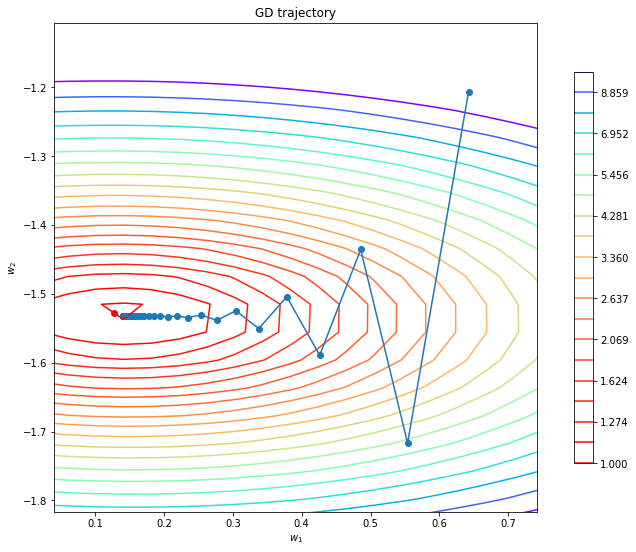

In [5]:
# compute level set
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

В курсе анализа получен результат о том, что градиент перпендикулярен линиям уровня. Это объясняет такие зигзагообразные траектории градиентного спуска. Для большей наглядности в каждой точке пространства посчитаем градиент функционала и покажем его направление.

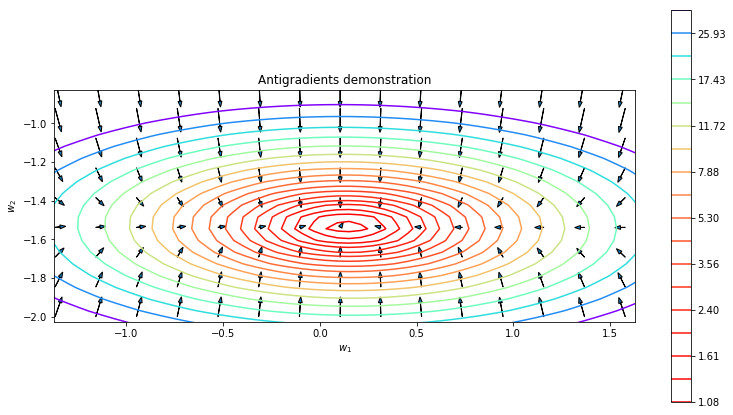

In [6]:
# compute level set
A, B = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
A_mini, B_mini = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 27))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
        
# visualize the level set
plt.figure(figsize=(13, 9))
CS = plt.contour(A, B, levels, levels=np.logspace(-1, 1.5, num=30), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
        
# visualize the gradients
gradients = np.empty_like(A_mini)
for i in range(A_mini.shape[0]):
    for j in range(A_mini.shape[1]):
        w_tmp = np.array([A_mini[i, j], B_mini[i, j]])
        antigrad = - 2*1e-3 * np.dot(X.T, np.dot(X, w_tmp) - Y) / Y.shape[0]
        plt.arrow(A_mini[i, j], B_mini[i, j], antigrad[0], antigrad[1], head_width=0.02)

plt.title('Antigradients demonstration')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_true[0] - 1.5, w_true[0] + 1.5))
plt.ylim((w_true[1] - .5, w_true[1] + .7))
plt.gca().set_aspect('equal')
plt.show()